Load in the required libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Load in the data files. You have two files, one for mass $m_1$ and the other for mass $m_2$. Load the files and use ; as the delimiter.

In [2]:
read_in_array_m1 = np.loadtxt('elastic 1 green car (m1).txt',delimiter=';')

read_in_array_m2 = np.loadtxt('elastic 1 yellow car (m2).txt',delimiter=';')


Extract the time and the position for both the files.

In [3]:
time_m1 = read_in_array_m1[:, 0]/1000

time_m2 = read_in_array_m2[:, 0]/1000

position_m1 = read_in_array_m1[:, 1]/100

position_m2 = read_in_array_m2[:, 1]/100


Plot the position as a function of time for mass $m_1$.

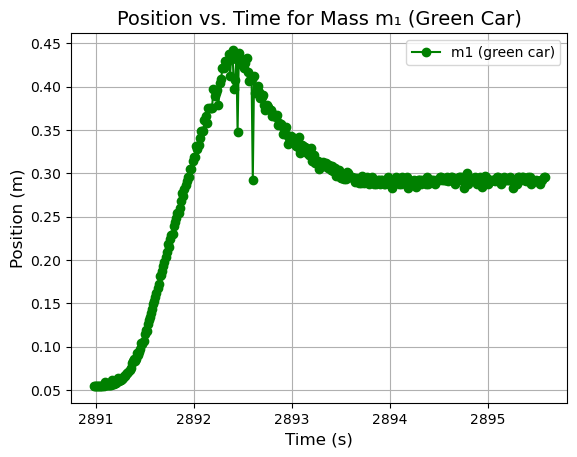

In [4]:
# Plot the position of m1 vs time

plt.plot(time_m1, position_m1, marker='o', linestyle='-', color='green', label='m1 (green car)')

# Use axes labels
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Position (m)', fontsize=12)
plt.title('Position vs. Time for Mass m₁ (Green Car)', fontsize=14)
plt.grid(True)
plt.legend()


Now we can plot the position of $m_1$ vs the array index to find the pre-collision and post-collision points of interest for both the masses.

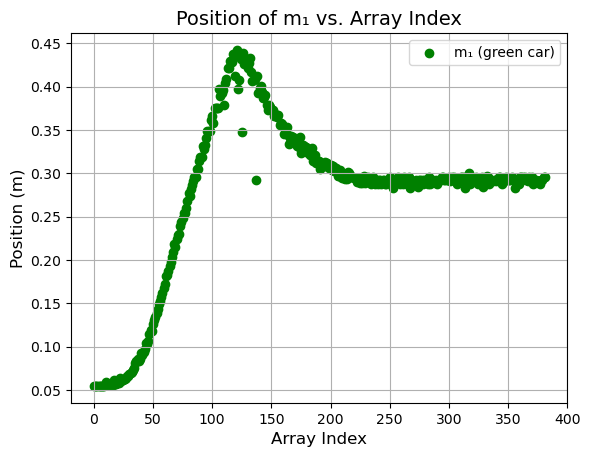

In [5]:
# Plot the position of m1 vs array index

array_indecies = np.arange(len(position_m1))

# Use plt.scatter(array_indecies, position_m1)
plt.scatter(array_indecies, position_m1, color='green', label='m₁ (green car)')

# Include axes labels
plt.xlabel('Array Index', fontsize=12)
plt.ylabel('Position (m)', fontsize=12)
plt.title('Position of m₁ vs. Array Index', fontsize=14)
plt.grid(True)
plt.legend()

plt.show()

This way we can get the points pre-collision and post-collision. Let's isolate the position and time array for pre and post collision now that we know the array index at the point of collision.

You may have to ignore a few points just before and just after the collision.

In [6]:
# Replace the ? with the start and end index of the pre-collision data
pos_m1_pre = position_m1[0:60]

# The indices for the time are going to be same as that of the position
time_m1_pre = time_m1[0:60]  

# Replace the ? with the start and end index of the post-collision data
pos_m1_post = position_m1[60:300]

# The indices for the time are going to be same as that of the position
time_m1_post = time_m1[60:300]  


Use np.polyfit() of degree 1 to find the velocity pre and post collision. Find the error in this velocity from the covariance matrix.

In [7]:
coeff_linear_pre_m1, cov_pre_m1 = np.polyfit(time_m1_pre, pos_m1_pre,1,cov=True)

# The slope of this curve is the velocity pre-collision
u1 = coeff_linear_pre_m1[0]

# The error in velocity is found from cov_pre
delta_u1 = np.sqrt(cov_pre_m1[0,0])

# Repeat the process to find the velocity and its error post-collision
# You can call the velocity v1 and its error as delta_v1

coeff_linear_post_m1, cov_post_m1 = np.polyfit(time_m1_post, pos_m1_post, 1, cov=True)

v1 = coeff_linear_post_m1[0]

delta_v1 = np.sqrt(cov_post_m1[0, 0])


print("Velocity before collision:", u1, "m/s")
print("Uncertainty before collision:", delta_u1, "m/s")
print("Velocity after collision:", v1, "m/s")
print("Uncertainty after collision:", delta_v1, "m/s")

Velocity before collision: 0.15974316390317334 m/s
Uncertainty before collision: 0.009543269650542675 m/s
Velocity after collision: -0.014176228474682603 m/s
Uncertainty after collision: 0.00400283626057347 m/s


You now have 4 important values. 

We have 

i) velocity of $m_1$ pre-collision : mean $u_1$ error $\delta u_1$

ii) velocity of $m_1$ post-collision : mean $v_1$ error $\delta v_1$

We still need to find $u_2$, $\delta u_2$, $v_2$ and $\delta v_2$. We do this by repeating the process starting from plotting the position vs time for $m_2$.

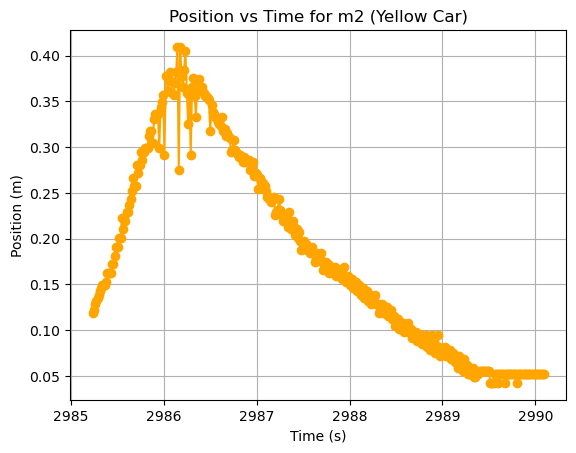

In [8]:
# Plot the position of m2 vs time
plt.plot(time_m2, position_m2, marker='o', linestyle='-', color='orange')

# Use axes labels
plt.xlabel("Time (s)")
plt.ylabel("Position (m)")
plt.title("Position vs Time for m2 (Yellow Car)")
plt.grid(True)

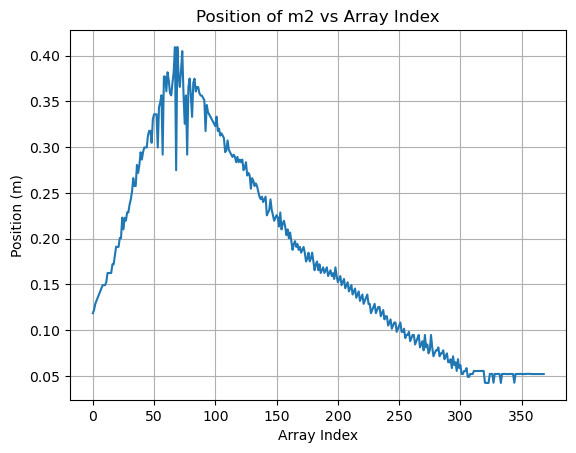

In [9]:
# Plot the position of m2 vs array index

plt.plot(position_m2)

# Use axes labels
plt.xlabel("Array Index")
plt.ylabel("Position (m)")
plt.title("Position of m2 vs Array Index")
plt.grid(True)

plt.show()


In [10]:
# Create arrays for pre and post collision position and time like you did for m1


pos_m2_pre = position_m2[0:60]
time_m2_pre = time_m2[0:60]


pos_m2_post = position_m2[60:300]
time_m2_post = time_m2[60:300]






In [11]:
# Find u2, v2 and associated errors using polyfit
coeff_linear_pre_m2, cov_pre_m2 = np.polyfit(time_m2_pre, pos_m2_pre, 1, cov=True)
coeff_linear_post_m2, cov_post_m2 = np.polyfit(time_m2_post, pos_m2_post, 1, cov=True)

u2 = coeff_linear_pre_m2[0]
delta_u2 = np.sqrt(cov_pre_m2[0, 0])

v2 = coeff_linear_post_m2[0]
delta_v2 = np.sqrt(cov_post_m2[0, 0])

print("Velocity before collision:", u2, "m/s")
print("Uncertainty before collision:", delta_u2, "m/s")
print("Velocity after collision:", v2, "m/s")
print("Uncertainty after collision:", delta_v2, "m/s")



Velocity before collision: 0.31392362160331316 m/s
Uncertainty before collision: 0.006844726681332995 m/s
Velocity after collision: -0.10472039337969682 m/s
Uncertainty after collision: 0.0012566728014688792 m/s


Now we know 8 important values.

i) velocity of $m_1$ pre-collision : mean $u_1$ error $\delta u_1$

ii) velocity of $m_1$ post-collision : mean $v_1$ error $\delta v_1$

iii) velocity of $m_2$ pre-collision : mean $u_2$ error $\delta u_2$

iv) velocity of $m_2$ post-collision : mean $v_2$ error $\delta v_2$

Create variables for storing the mass of $m_1$ and $m_2$ as well as the associated $\delta m_1$ and $\delta m_2$.

$\delta m_1$ and $\delta m_2$ are the minimum measurements on the scale.

In [12]:
#values are in kg

m1 = 0.522

m2 = 0.506

delta_m1 = .001

delta_m2 = .001


You have already built the functions to find momentum, error in momentum, energy and error in energy in the Pre-lab. Please copy the functions from the cell and paste them into cells in this notebook. 

In [13]:
# define momentum function
def momentum(m,v):
    p = m*v
    
    return p

In [14]:
# define momentum error function
def momentum_error(m, delta_m, v, delta_v):
    delta_p = np.sqrt((v * delta_m)**2 + (m * delta_v)**2)
    return delta_p

In [15]:
# define energy function
def kinetic_energy(m,v):
    K = (0.5)*m*v**2

    return K

In [16]:
# define energy error function
def kinetic_energy_error(m, delta_m, v, delta_v):
    delta_K = np.sqrt(((0.5 * v**2) * delta_m)**2 + ((m * v) * delta_v)**2)
    return delta_K

Now, call the functions on the values that you have. Remember that the order of inputs into the function call must be in exactly the same order as the function definition. 

# Momentum and errors

In [17]:
# m1 initial momentum with error
p1_initial = momentum(m1, u1)
delta_p1_initial = momentum_error(m1, delta_m1, u1, delta_u1)

print("m1 initial momentum:", p1_initial, "kgm/s", "±", delta_p1_initial, "kgm/s")

m1 initial momentum: 0.08338593155745648 kgm/s ± 0.004984147319426148 kgm/s


In [18]:
# m2 initial momentum with error
p2_initial = momentum(m2, u2)
delta_p2_initial = momentum_error(m2, delta_m2, u2, delta_u2)

print("m2 initial momentum:", p2_initial, "kgm/s", "±", delta_p2_initial, "kgm/s")

m2 initial momentum: 0.15884535253127646 kgm/s ± 0.0034776295354726496 kgm/s


In [19]:
# m1 final momentum with error
p1_final = momentum(m1, v1)
delta_p1_final = momentum_error(m1, delta_m1, v1, delta_v1)

print("m1 final momentum:", p1_final, "kgm/s", "±", delta_p1_final, "kgm/s")

m1 final momentum: -0.007399991263784319 kgm/s ± 0.0020895286172784985 kgm/s


In [20]:
# m2 final momentum with error
p2_final = momentum(m2, v2)
delta_p2_final = momentum_error(m2, delta_m2, v2, delta_v2)

print("m2 final momentum:", p2_final, "kgm/s", "±", delta_p2_final, "kgm/s")

m2 final momentum: -0.052988519050126595 kgm/s ± 0.000644441777519348 kgm/s


System momentum loss :

If the initial momentum and error of $m_1$ are $p_{1i}$ and $\delta p_{1i}$, initial momentum with error of $m_2$ are $p_{2i}$ and $\delta p_{2i}$, final momentum and error of $m_1$ are $p_{1f}$ and $\delta p_{1f}$, final momentum with error of $m_2$ are $p_{2f}$ and $\delta p_{2f}$ then,

The system momentum loss is $(p_{1i} + p_{2i}) - (p_{1f} + p_{2f})$

The error in system momentum loss is $ \sqrt {({\delta p_{1i}})^2 + ({\delta p_{2i}})^2 + ({\delta p_{1f}})^2 +({\delta p_{2f}})^2} $

In [21]:
# System momentum loss
system_momentum_loss = (p1_initial + p2_initial) - (p1_final + p2_final)

# Error in system momentum loss
delta_system_momentum_loss = np.sqrt(
    (delta_p1_initial)**2 +
    (delta_p2_initial)**2 +
    (delta_p1_final)**2 +
    (delta_p2_final)**2
)


print("System momentum loss:", system_momentum_loss, "kg·m/s")
print("Uncertainty in system momentum loss:", delta_system_momentum_loss, "kg·m/s")

System momentum loss: 0.30261979440264386 kg·m/s
Uncertainty in system momentum loss: 0.006458875036318064 kg·m/s


# Energy and errors

Follow the procedure outlined in the momentum section and find the energies and associated errors.

In [22]:
K1_initial = kinetic_energy(m1, u1)
delta_K1_initial = kinetic_energy_error(m1, delta_m1, u1, delta_u1)
print("m1 initial KE:", K1_initial, "J, uncertainty:", delta_K1_initial)

K2_initial = kinetic_energy(m2, u2)
delta_K2_initial = kinetic_energy_error(m2, delta_m2, u2, delta_u2)
print("m2 initial KE:", K2_initial, "J, uncertainty:", delta_K2_initial)

K1_final = kinetic_energy(m1, v1)
delta_K1_final = kinetic_energy_error(m1, delta_m1, v1, delta_v1)
print("m1 final KE:", K1_final, "J, uncertainty:", delta_K1_final)

K2_final = kinetic_energy(m2, v2)
delta_K2_final = kinetic_energy_error(m2, delta_m2, v2, delta_v2)
print("m2 final KE:", K2_final, "J, uncertainty:", delta_K2_final)

m1 initial KE: 0.006660166266000782 J, uncertainty: 0.0007958767076849515
m2 initial KE: 0.024932654170736656 J, uncertainty: 0.0010883689927484095
m1 final KE: 5.245198343303088e-05 J, uncertainty: 2.9621123791154895e-05
m2 final KE: 0.002774489279768408 J, uncertainty: 6.681460102291057e-05


Find the system energy loss and its associated error.

In [23]:
system_energy_loss = (K1_initial + K2_initial) - (K1_final + K2_final)

delta_system_energy_loss = np.sqrt(
    (delta_K1_initial)**2 +
    (delta_K2_initial)**2 +
    (delta_K1_final)**2 +
    (delta_K2_final)**2
)

print("System energy loss:", system_energy_loss, "J")
print("Uncertainty in system energy loss:", delta_system_energy_loss, "J")

System energy loss: 0.028765879173536 J
Uncertainty in system energy loss: 0.0013502993742485873 J


Once this is done, fill up one of the rows of the tables in the slides with your values. Fill up the other rows by taking the values from your teammates.

In [24]:
import os
os.getcwd()

'/home/jovyan/Physics_4AL/Unit 2'